<h1 style = "font-size:3rem;color:darkcyan"> Speech Recognition - Digits </h1>

Training model to recognize spoken digits (0-9)

In [164]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import librosa
import librosa.display

import os
import sklearn

In [141]:
# importing data
# using the data set from: https://github.com/soerenab/AudioMNIST
root = '../../Datasets/Speech/Digits/AudioMNIST/data/01/'
filenames = os.listdir(root)
print(f'Number of audio files: {len(filenames)} ')
root

Number of audio files: 500 


'../../Datasets/Speech/Digits/AudioMNIST/data/01/'

In [142]:
# extract label/ digit. In this case it is the first digit in the file name

labels = np.zeros(len(filenames))

def extract_label(filename):
    return filename[0]

In [296]:
# create feature array

#data, = librosa.load('./data/'+name, sr = sr, mono=True)
n_mfcc = 20
features = np.zeros((len(filenames), n_mfcc))

In [297]:
sr = 48000
for i in range(len(filenames)):
    data, _ = librosa.load(root + filenames[i], sr= sr, mono=True)
    mfcc = librosa.feature.mfcc(y = data, sr = sr, n_mfcc=n_mfcc)
    features[i] = mfcc.T.mean(0) # matrix mean
    labels[i] = extract_label(filenames[i])

Text(0.5, 0, 'Digit Label')

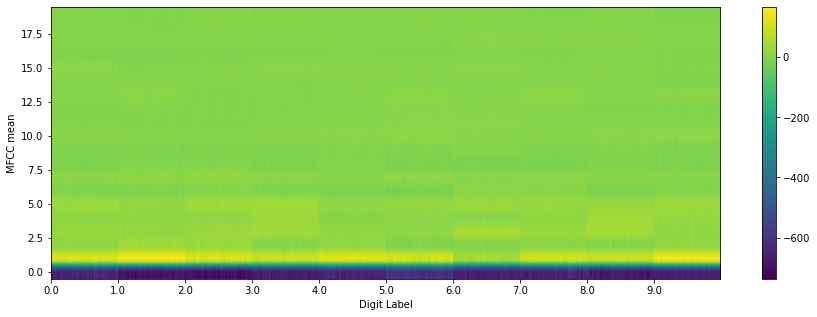

In [298]:
#plt.plot(features)
x_ticks = np.linspace(0, 450, 10)
#print(x_ticks)
x_labels = np.linspace(0, 9, 10)
#print(x_labels)
#plt.xticks(ticks=x_ticks, labels= x_labels)
#print(x_ticks)

fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(111)

img = ax.imshow(features.T)
fig.colorbar(img)

ax.set_aspect('auto')
plt.gca().invert_yaxis()

ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels)

ax.set_ylabel('MFCC mean')
ax.set_xlabel('Digit Label')
#plt.title('Mel Spectrogram')

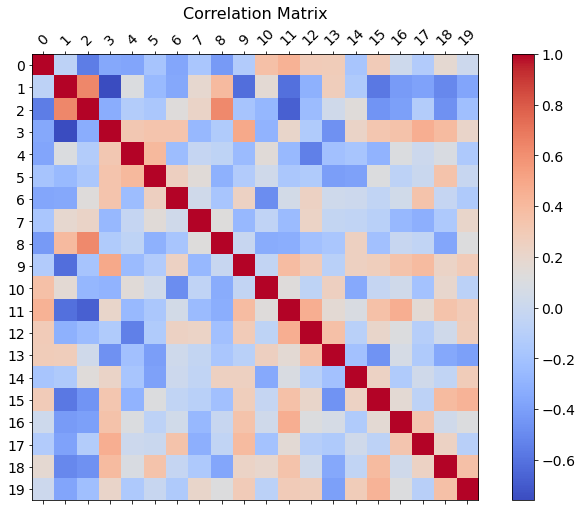

In [299]:
feature_names = np.linspace(0, n_mfcc - 1,n_mfcc)
df = pd.DataFrame(features)
f = plt.figure(figsize=(12, 8))
plt.matshow(df.corr(), fignum=f.number, cmap = 'coolwarm')
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [300]:
features[110]

array([-7.09e+02,  1.20e+02,  3.28e+01,  3.32e+01,  1.99e+01,  3.59e+01,
       -2.61e-01,  2.13e+01,  9.73e-01, -5.73e+00,  5.09e+00, -2.44e+00,
       -3.40e-01, -9.73e-01, -5.90e-01,  1.51e+00, -4.75e+00,  2.87e+00,
        4.10e+00,  4.36e+00])

In [301]:
data, _  = librosa.load(root + filenames[10], sr= sr, mono=True)
mfcc = librosa.feature.mfcc(y = data, sr = sr, n_mfcc=20)

print(mfcc.T.mean(0).shape)

(20,)


In [302]:
#merging everything into a single data structure
dataset = pd.DataFrame(features)
dataset['label'] = labels
dataset['filename'] = filenames

#we can save the dataset to a file to resume working without re-computing the features (unless you want to change them)
#dataset.to_csv('dataset.csv')
dataset

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,label,filename
0,-651.792969,125.082855,14.676184,24.476522,14.822341,32.524208,-6.852278,14.238191,-6.298679,-6.007290,...,-4.968721,-0.302329,0.783053,10.485610,-9.527535,0.884058,3.378313,-0.157332,0.0,0_01_0.wav
1,-675.418701,120.496872,17.857576,29.651102,18.610928,36.867523,-3.063675,10.415971,-5.865927,-2.258434,...,-3.186392,2.689194,1.196756,9.212469,-5.772840,4.626551,5.608649,2.007937,0.0,0_01_1.wav
2,-630.504883,119.078598,13.994834,16.210178,13.585836,34.013218,-7.132136,15.575432,-7.252302,-5.977500,...,-2.659422,-3.452109,-0.733885,10.246149,-7.509597,4.174634,1.399633,0.845211,0.0,0_01_10.wav
3,-633.645142,126.591614,9.361505,15.723633,11.496635,32.401176,-6.404471,5.314328,-11.817913,-8.420235,...,-0.776027,0.319248,5.095439,13.526354,-8.272698,1.134416,3.302846,-1.863230,0.0,0_01_11.wav
4,-661.522644,115.404343,14.578478,30.359596,11.532448,27.510567,-2.776231,8.657968,-9.531140,-4.685847,...,-5.533944,2.051777,2.917758,11.107314,-5.143217,-1.347403,-1.051834,-1.174666,0.0,0_01_12.wav
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-654.175171,151.684784,14.259411,18.105141,27.462458,35.312263,0.257521,10.189726,-14.902138,-5.527821,...,-4.008742,8.974789,-4.600615,-3.259966,-3.641941,3.196740,-1.248120,-6.857622,9.0,9_01_5.wav
496,-652.993042,145.096649,14.883977,13.310986,25.218618,28.151125,-3.271293,2.912707,-7.163751,-8.503722,...,-5.306547,12.494352,-2.795086,1.970394,-2.656785,2.625086,-1.907182,-8.387867,9.0,9_01_6.wav
497,-665.772827,148.480469,18.256050,20.747425,27.836048,32.982929,-2.678614,7.484133,-9.572830,-4.286159,...,-2.701041,11.169509,-6.080407,-4.797315,-6.474770,2.528116,2.561337,-5.260597,9.0,9_01_7.wav
498,-645.388184,148.433228,14.483644,19.543314,23.071764,35.208382,-2.427772,4.965972,-2.342974,-7.207133,...,-5.369818,6.100360,-4.146651,0.571974,-5.703734,1.603952,2.725619,-9.138333,9.0,9_01_8.wav


In [303]:
from sklearn.model_selection import train_test_split

#splitting the dataset in training and testing parts
feat_train, feat_test, lab_train, lab_test = train_test_split(features, labels, test_size=0.2, random_state=52)

In [304]:
#learning the scaling transformation from the train data and applying it to both train and test set.

#creating scaling object
scaler = sklearn.preprocessing.StandardScaler()

#learning scaling from train set
scaler.fit(feat_train)

#applying scaling to both train and test set
feat_train = scaler.transform(feat_train)
feat_test = scaler.transform(feat_test)

In [305]:
#Import the classifier
from sklearn.neural_network import MLPClassifier

##Creating an instance of a MLP classifier
#and setting it some option (max mum epoch, verbose on, activation of neurons)
mlp = MLPClassifier(hidden_layer_sizes=(n_mfcc), max_iter=2000, activation='relu', verbose=True)

#train the model
mlp.fit(feat_train, lab_train)

#applying the the model on the test data (features)
lab_predict = mlp.predict(feat_test)
print('Accuracy:',sklearn.metrics.accuracy_score(lab_test, lab_predict))

Iteration 1, loss = 2.77353468
Iteration 2, loss = 2.72193668
Iteration 3, loss = 2.67066702
Iteration 4, loss = 2.62254667
Iteration 5, loss = 2.57367522
Iteration 6, loss = 2.52703197
Iteration 7, loss = 2.48075850
Iteration 8, loss = 2.43629446
Iteration 9, loss = 2.39200598
Iteration 10, loss = 2.34904906
Iteration 11, loss = 2.30701161
Iteration 12, loss = 2.26628469
Iteration 13, loss = 2.22646554
Iteration 14, loss = 2.18776791
Iteration 15, loss = 2.14991463
Iteration 16, loss = 2.11314599
Iteration 17, loss = 2.07700067
Iteration 18, loss = 2.04159818
Iteration 19, loss = 2.00753434
Iteration 20, loss = 1.97381397
Iteration 21, loss = 1.94062604
Iteration 22, loss = 1.90855983
Iteration 23, loss = 1.87730593
Iteration 24, loss = 1.84636947
Iteration 25, loss = 1.81516978
Iteration 26, loss = 1.78566202
Iteration 27, loss = 1.75641006
Iteration 28, loss = 1.72696675
Iteration 29, loss = 1.69870755
Iteration 30, loss = 1.67083486
Iteration 31, loss = 1.64305240
Iteration 32, los

Iteration 281, loss = 0.04479517
Iteration 282, loss = 0.04446443
Iteration 283, loss = 0.04412246
Iteration 284, loss = 0.04377808
Iteration 285, loss = 0.04344971
Iteration 286, loss = 0.04312199
Iteration 287, loss = 0.04279326
Iteration 288, loss = 0.04247648
Iteration 289, loss = 0.04215922
Iteration 290, loss = 0.04186485
Iteration 291, loss = 0.04154801
Iteration 292, loss = 0.04122604
Iteration 293, loss = 0.04093769
Iteration 294, loss = 0.04063213
Iteration 295, loss = 0.04033474
Iteration 296, loss = 0.04005397
Iteration 297, loss = 0.03975702
Iteration 298, loss = 0.03946486
Iteration 299, loss = 0.03918834
Iteration 300, loss = 0.03891770
Iteration 301, loss = 0.03863447
Iteration 302, loss = 0.03835674
Iteration 303, loss = 0.03808373
Iteration 304, loss = 0.03781928
Iteration 305, loss = 0.03755656
Iteration 306, loss = 0.03729802
Iteration 307, loss = 0.03703528
Iteration 308, loss = 0.03678081
Iteration 309, loss = 0.03652874
Iteration 310, loss = 0.03627299
Iteration 

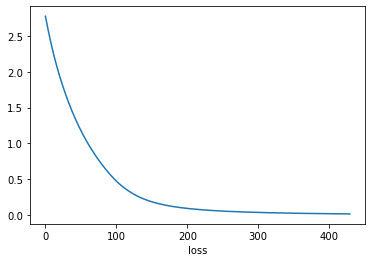

Mean squared error: 1.1727
Mean absolute error: 0.6115
Median absolute error: 0.3295
Coefficient of determination (R2 score): 0.8552
Explained variance score: 0.8559
R2 score on individual targets [0.86]


In [306]:
#plotting the loss curve over training iteration 
plt.plot(mlp.loss_curve_)
plt.xlabel('iteration')
plt.xlabel('loss')
plt.show()

#computing a set of performance metrics

#mean squared error (lower the better)
print('Mean squared error: %.4f'% sklearn.metrics.mean_squared_error(tar_test, tar_pred))

#mean absolute error (lower the better)
print('Mean absolute error: %.4f'% sklearn.metrics.mean_absolute_error(tar_test, tar_pred))

#median absolute error (lower the better)
print('Median absolute error: %.4f'% sklearn.metrics.median_absolute_error(tar_test, tar_pred))

#coefficient of determination (r2 score): 1 is perfect prediction (it can get arbitrary negative)
print('Coefficient of determination (R2 score): %.4f'% sklearn.metrics.r2_score(tar_test, tar_pred))

#explained variance score: 1 is perfect prediction (it can get arbitrary worse)
print('Explained variance score: %.4f'% sklearn.metrics.explained_variance_score(tar_test, tar_pred))

#this is is a better represenation of the r2 score when working with multiple outputs
#as it provides a value for each target value
print('R2 score on individual targets',sklearn.metrics.r2_score(tar_test, tar_pred, multioutput='raw_values') )

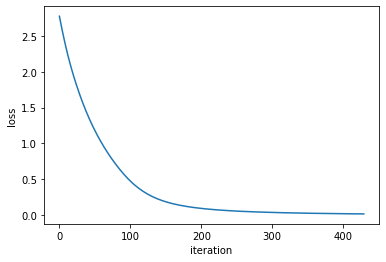

Number of mislabeled samples 0 out of 100
Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00         5
         2.0       1.00      1.00      1.00        12
         3.0       1.00      1.00      1.00         8
         4.0       1.00      1.00      1.00        14
         5.0       1.00      1.00      1.00        10
         6.0       1.00      1.00      1.00         5
         7.0       1.00      1.00      1.00        10
         8.0       1.00      1.00      1.00        16
         9.0       1.00      1.00      1.00         9

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

confusion matrix
[[11  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  0]
 [ 

In [307]:
#plotting the loss curve over training iteration 
plt.plot(mlp.loss_curve_)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

#print the number of misclassified samples, accuracy and complete report (using scikit learn metric tools) 
print('Number of mislabeled samples %d out of %d' % ((lab_test != lab_predict).sum(),lab_test.size))
print('Accuracy:',sklearn.metrics.accuracy_score(lab_test, lab_predict))
print(sklearn.metrics.classification_report(lab_test, lab_predict))
print('confusion matrix')
print(sklearn.metrics.confusion_matrix(lab_test,lab_predict))

Confusion matrix, without normalization
[[11  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  0  5  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0  0  0  9]]
Normalized confusion matrix
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


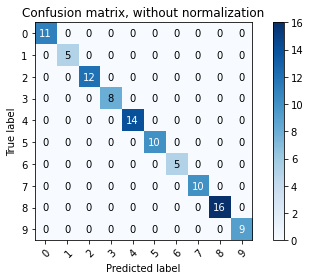

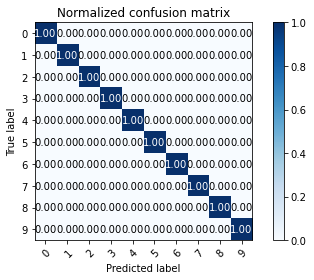

In [308]:
#this is a better way of visualizing the confusion matrix

#defining a function for the confusion matrix display 
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[sklearn.utils.multiclass.unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

#setting the precision to two digits after the decimal point
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(lab_test, lab_predict, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(lab_test, lab_predict, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], normalize=True,
                      title='Normalized confusion matrix')

plt.show()